In [2]:
import pandas as pd

In [5]:
df=pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
df=pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [8]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [51]:
df.dropna()

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [81]:
train = df.iloc[:-12]
test =df.iloc[-12:]

In [82]:
train.shape

(7576, 1)

In [83]:
test

,Ex_rate
date,
2010-09-29,0.724506
2010-09-30,0.721553
2010-01-10,0.717618
2010-02-10,0.719114
2010-03-10,0.719114
2010-04-10,0.719735
2010-05-10,0.718701
2010-06-10,0.718494
2010-07-10,0.721839


In [52]:
import matplotlib.pyplot as plt


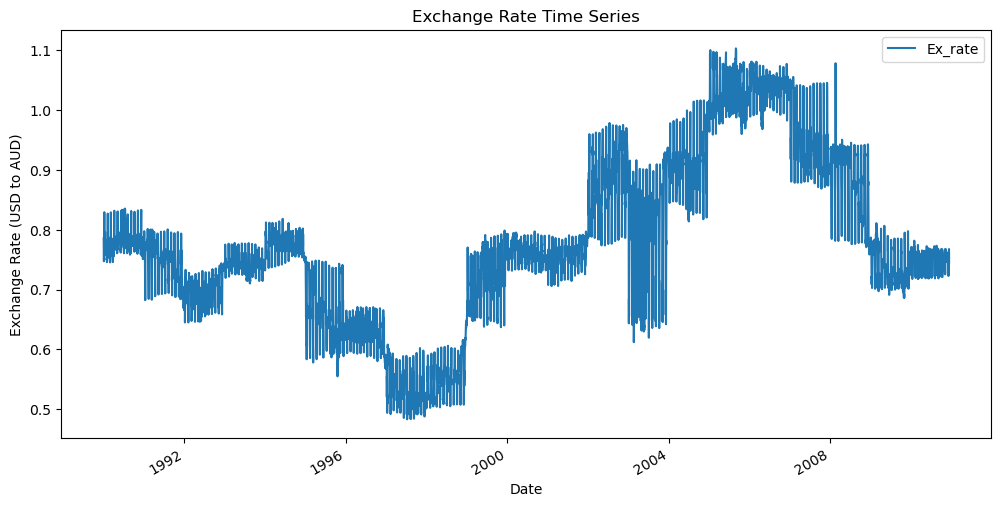

In [53]:
# Plot the time series
df.plot(figsize=(12, 6))
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.show()

In [54]:
# Check for missing values
df.isnull().sum()


Ex_rate    0
dtype: int64

In [55]:
# Fill missing values using forward fill method
df = df.fillna(method='ffill')

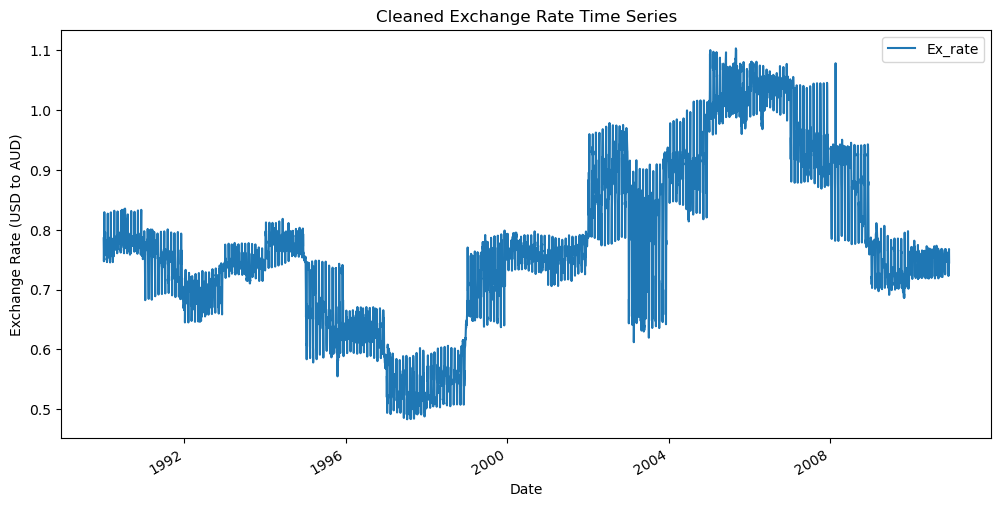

In [56]:
# Plot again to ensure data looks clean
df.plot(figsize=(12, 6))
plt.title('Cleaned Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to AUD)')
plt.show()

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


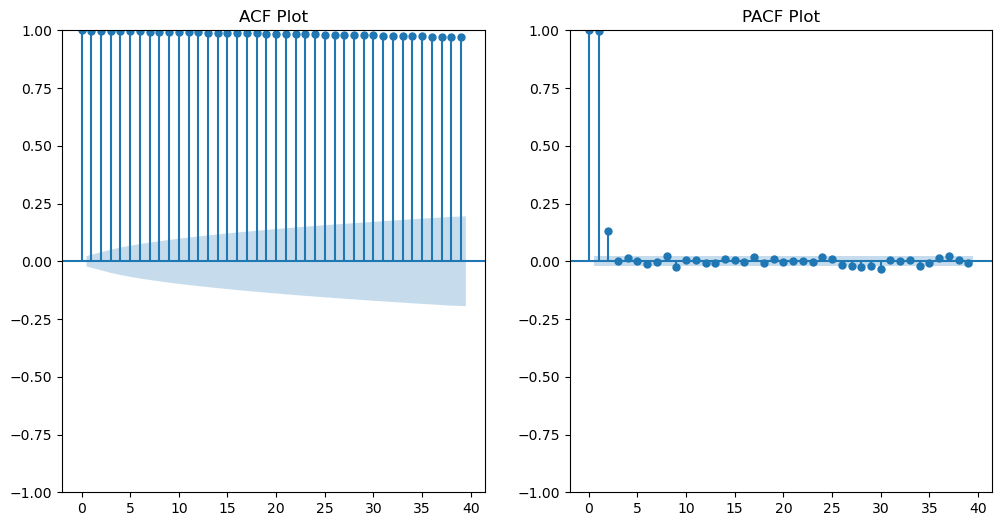

In [58]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
# Fit ARIMA model (example with p=1, d=1, q=1, adjust as needed based on ACF/PACF)
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packa

In [61]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 06 Sep 2024   AIC                         -56102.322
Time:                        17:48:27   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

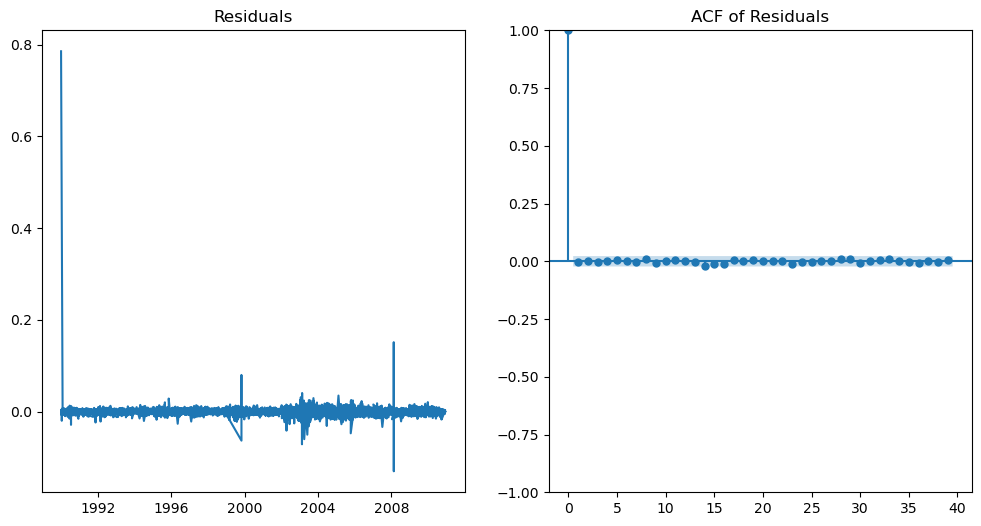

In [62]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(122)
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.show()

In [63]:
# Forecast future values
forecast = model_fit.forecast(steps=12)

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


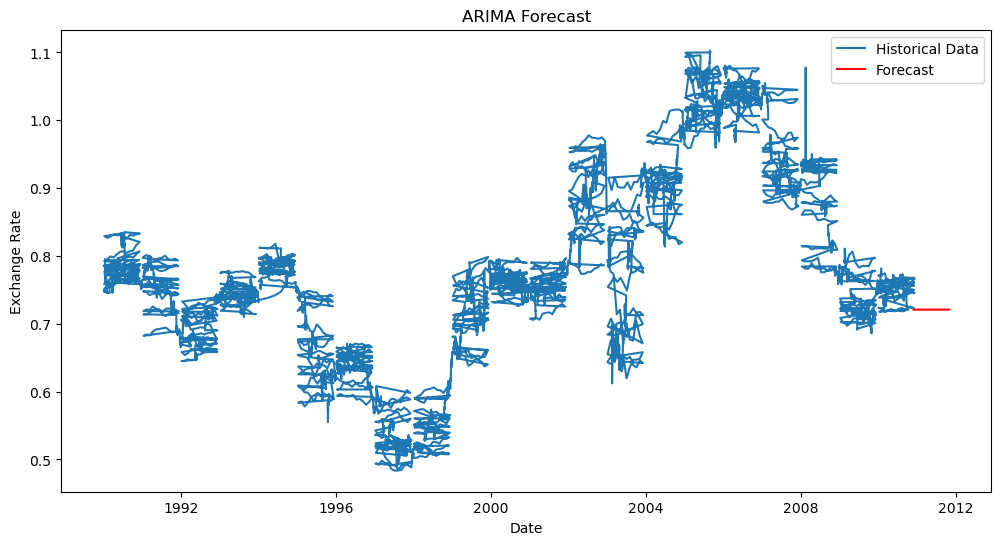

In [64]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
# Choose the model based on time series characteristics
model = ExponentialSmoothing(df, seasonal='add', seasonal_periods=12)

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
# Fit the model with default parameters, then tune as needed
model_fit = model.fit()



In [68]:
# Print model summary
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Fri, 06 Sep 2024
Box-Cox:                          False   Time:                         17:48:29
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698377                alpha                 True
smoothing_seasonal       

In [69]:
# Forecast future values
forecast_exp = model_fit.forecast(steps=12)


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


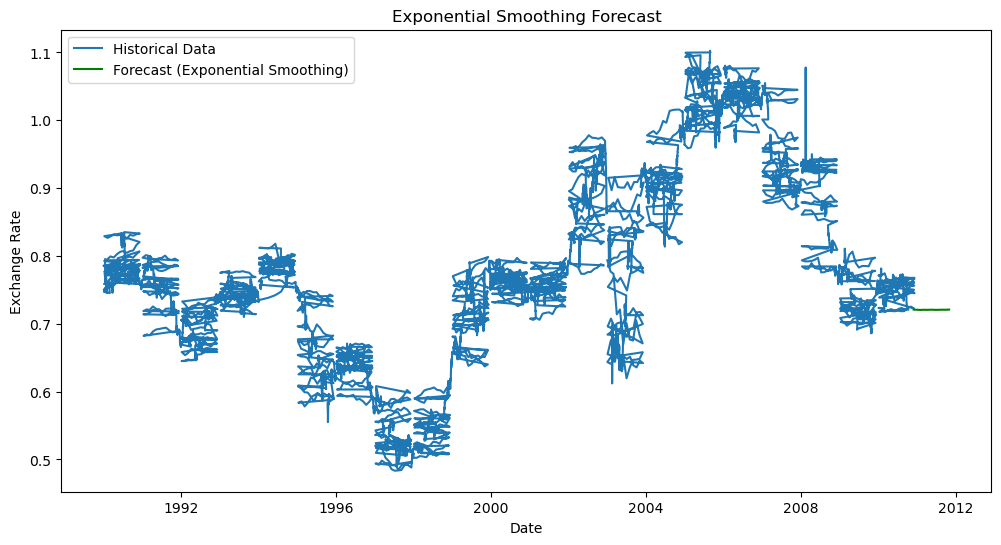

In [70]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Data')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast_exp, label='Forecast (Exponential Smoothing)', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()